Predict with pre-trained ResNet models
==========================================

This notebook shows how to play with pre-trained ResNet models with only a few
lines of code.

First let's import some necessary libraries:


In [1]:
! pip install -q gluoncv

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline
from gluoncv import model_zoo
from gluoncv.data.transforms.presets.imagenet import transform_eval
from gluoncv.utils.viz.image import plot_image
from matplotlib import pyplot as plt
from mxnet import nd, image

Load a pretrained model
-------------------------

Let's get a ResNet 50 model trained with on ImageNet as the base model. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.



In [3]:
net = model_zoo.get_model('ResNet50_v1', pretrained=True)

100%|██████████| 57421/57421 [00:01<00:00, 46954.87KB/s]


Pre-process an image
--------------------

Next we download an image, and pre-process with preset data transforms
`transform_eval` from GluonCV.

In [4]:
# import the datasets
import boto3
import os
from os import path
import pandas as pd
import zipfile

bucketname = 'mlu-courses-datalake' # replace with your bucket name
filename = 'MLA-CV/data/catdog.png' # replace with your object key

pathname = '../../data/'
s3 = boto3.resource('s3')
if not path.exists("../../data/"):
    try:
        os.makedirs(pathname)
    except OSError:
        print ("Creation of the directory %s failed" % path)

s3.Bucket(bucketname).download_file(filename , '../../data/catdog.png')

print ("Successfully created the directory %s " % path)

Successfully created the directory <module 'posixpath' from '/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/posixpath.py'> 


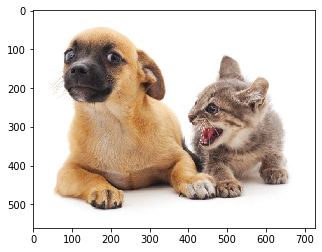

In [5]:
img_raw = image.imread('../../data/catdog.png')
img = transform_eval(img_raw)
plot_image(img_raw)

Inference using ResNet50
---------------------

Now let's generate the predictions from the pretrained ResNet50.
`pred` will be list of ndarray, where each ndarray is of length 1000.
Each number of this 1000-length ndarray can be applied `softmax` to 
represent the prediction confidence towards each of the [subject classes in ImageNet](http://image-net.org/explore).

In [6]:
pred = net(img)
len(pred[0])

1000

Let's take a look of the first 5 classes!

In [7]:
classes = net.classes
classes[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

In [8]:
topK = 5
ind = nd.topk(pred, k=topK)[0].astype('int')
print('The input picture is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%
          (classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))

The input picture is classified to be
	[Chihuahua], with probability 0.451.
	[Brabancon griffon], with probability 0.035.
	[bull mastiff], with probability 0.016.
	[Rhodesian ridgeback], with probability 0.010.
	[Border terrier], with probability 0.008.
